In [1]:
%run ../init_notebook.py

Module aliases imported by init_notebook.py:
--------------------------------------------
import numpy as np

import pandas as pd

import statsmodels.formula.api as smf

import pymc as pm

import xarray as xr

import arviz as az

import utils as utils

from scipy import stats as stats

from matplotlib import pyplot as plt

Watermark:
----------
Last updated: 2024-01-26T06:15:46.554890+01:00

Python implementation: CPython
Python version       : 3.11.7
IPython version      : 8.19.0

Compiler    : Clang 16.0.6 
OS          : Darwin
Release     : 23.3.0
Machine     : x86_64
Processor   : i386
CPU cores   : 8
Architecture: 64bit

pandas     : 2.1.4
matplotlib : 3.8.2
xarray     : 2023.12.0
arviz      : 0.17.0
numpy      : 1.26.2
statsmodels: 0.14.1
pymc       : 5.10.3
scipy      : 1.11.4



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import arviz as az
import seaborn as sns

In [3]:
%config InlineBackend.figure_format = 'retina'
RANDOM_SEED = 42
rng = np.random.default_rng(RANDOM_SEED)
az.style.use("arviz-darkgrid")
sns.set_theme(palette="colorblind")

In [4]:
theta = np.linspace(0, 1, 11)
print(theta)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [5]:
unif_distr_pdf = stats.uniform.pdf(theta) 
unif_distr_pdf = unif_distr_pdf / np.sum(unif_distr_pdf)
unif_distr_pdf

array([0.09090909, 0.09090909, 0.09090909, 0.09090909, 0.09090909,
       0.09090909, 0.09090909, 0.09090909, 0.09090909, 0.09090909,
       0.09090909])

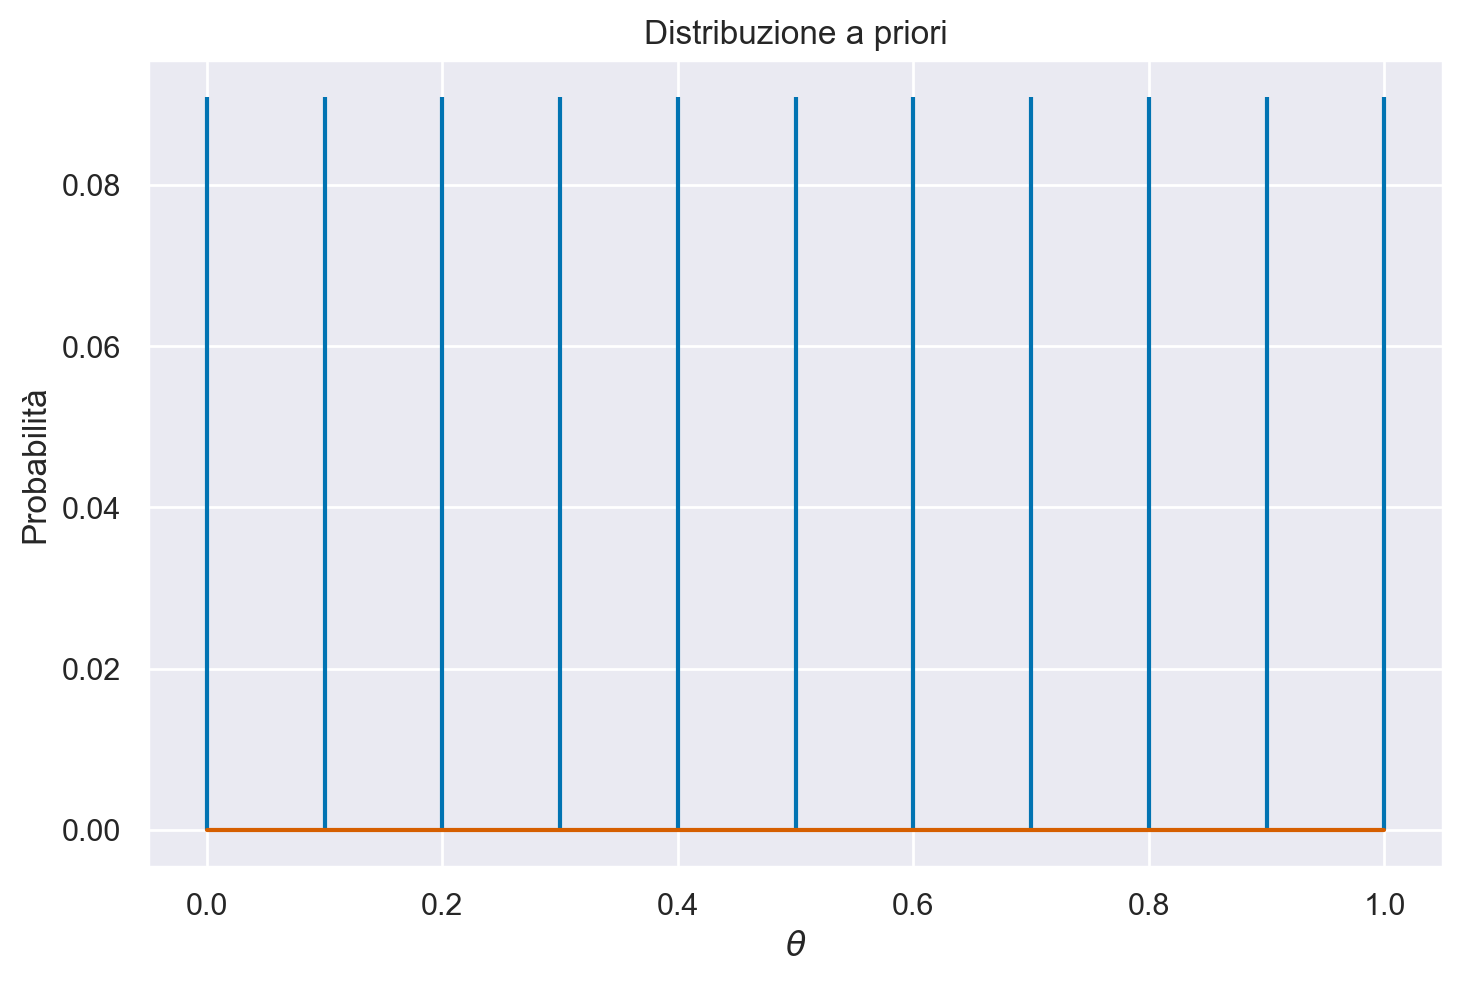

In [6]:
plt.stem(theta, unif_distr_pdf, markerfmt=" ")
plt.title("Distribuzione a priori")
plt.xlabel("$\\theta$")
plt.ylabel("Probabilità");

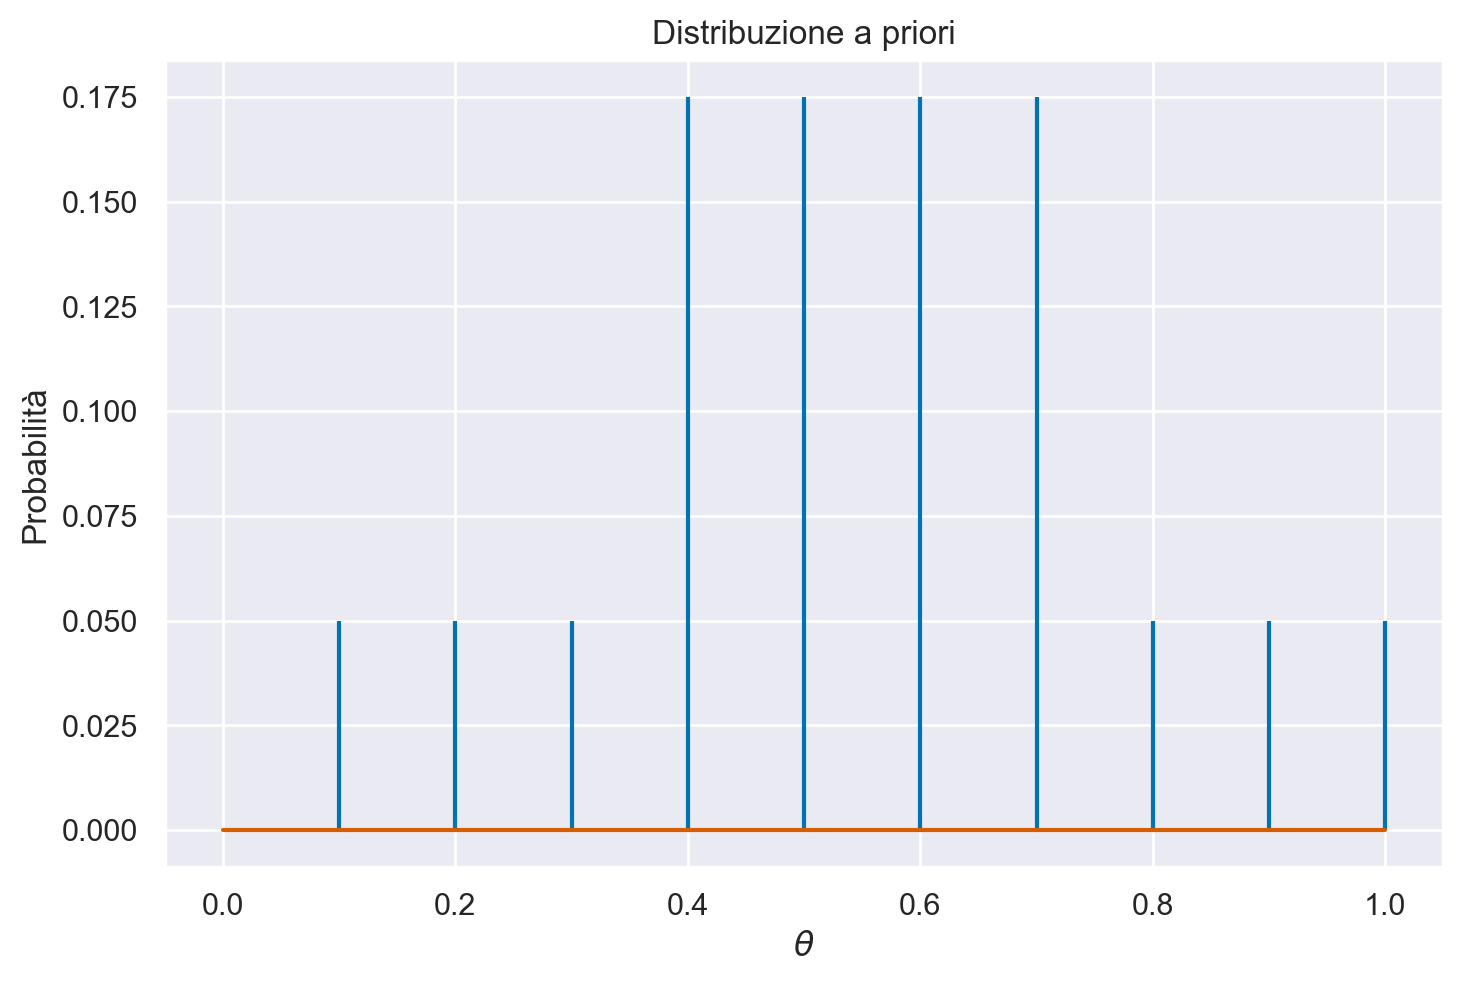

In [7]:
not_unif_distr_pdf = [0, 0.05, 0.05, 0.05, 0.175, 0.175, 0.175, 0.175, 0.05, 0.05, 0.05]
plt.stem(theta, not_unif_distr_pdf, markerfmt=" ")
plt.title("Distribuzione a priori")
plt.xlabel("$\\theta$")
plt.ylabel("Probabilità");

In [8]:
lk = stats.binom.pmf(12, 20, theta)
lk = lk / np.sum(lk)
lk

array([0.00000000e+00, 1.13872974e-07, 1.81785999e-04, 8.10438314e-03,
       7.45436212e-02, 2.52278752e-01, 3.77377083e-01, 2.40229925e-01,
       4.65372158e-02, 7.47120582e-04, 0.00000000e+00])

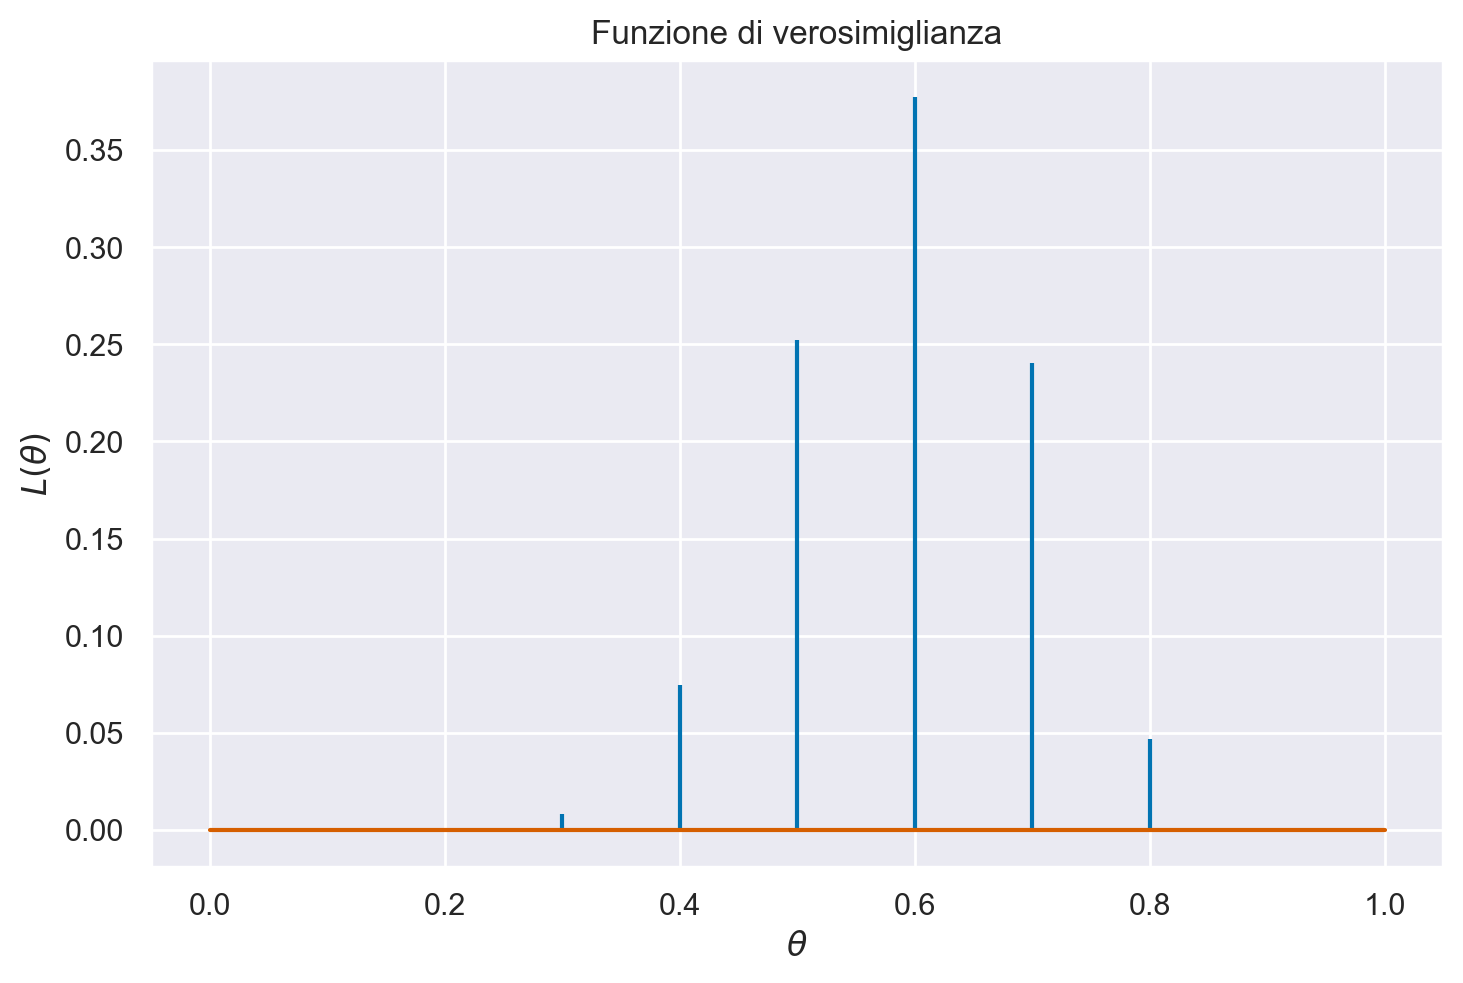

In [9]:
plt.stem(theta, lk, markerfmt=" ")
plt.title("Funzione di verosimiglianza")
plt.xlabel("$\\theta$")
plt.ylabel("$L(\\theta)$");

In [10]:
not_unif_distr_pdf * lk

array([0.00000000e+00, 5.69364870e-09, 9.08929995e-06, 4.05219157e-04,
       1.30451337e-02, 4.41487816e-02, 6.60409894e-02, 4.20402368e-02,
       2.32686079e-03, 3.73560291e-05, 0.00000000e+00])

In [11]:
not_unif_distr_pdf[7] * lk[7]

0.042040236839098216

In [12]:
np.sum(not_unif_distr_pdf * lk)

0.16805367258175838

In [13]:
post = (not_unif_distr_pdf * lk) / np.sum(not_unif_distr_pdf * lk)
print(post)

[0.00000000e+00 3.38799421e-08 5.40856966e-05 2.41124845e-03
 7.76248059e-02 2.62706437e-01 3.92975580e-01 2.50159584e-01
 1.38459383e-02 2.22286300e-04 0.00000000e+00]


In [14]:
np.sum(post)

1.0000000000000002

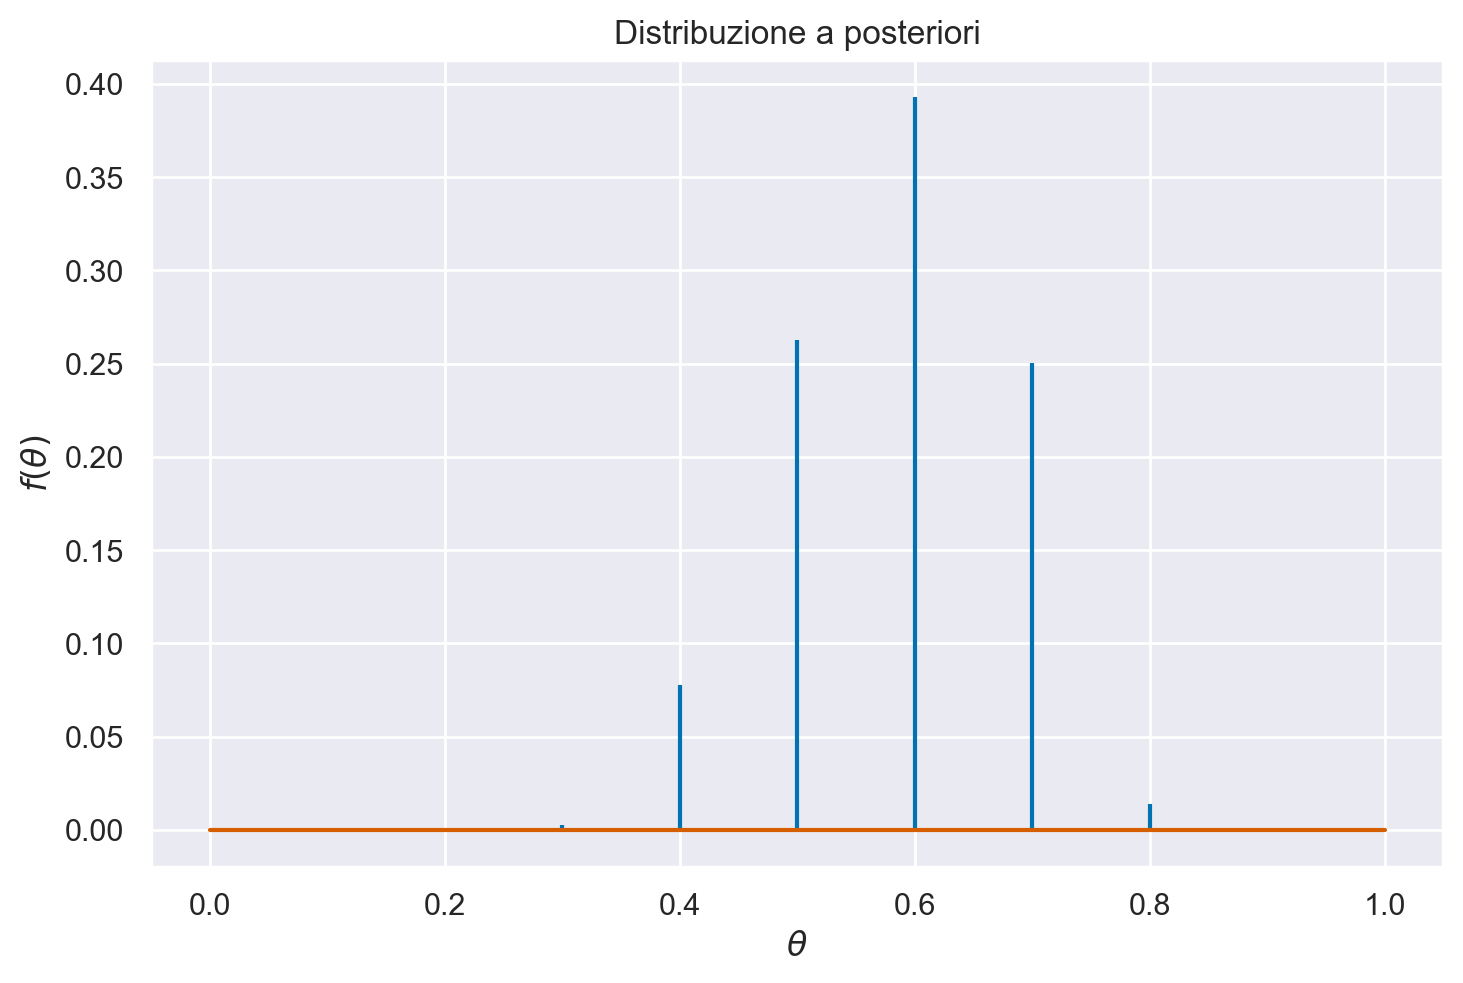

In [15]:
plt.stem(theta, post, markerfmt=" ")
plt.title("Distribuzione a posteriori")
plt.xlabel("$\\theta$")
plt.ylabel(r"$f(\theta)$");

In [16]:
np.sum(theta * post)

0.5853112012901505

In [17]:
np.sum(theta**2 * post) - (np.sum(theta * post)) ** 2

0.008817409486062244

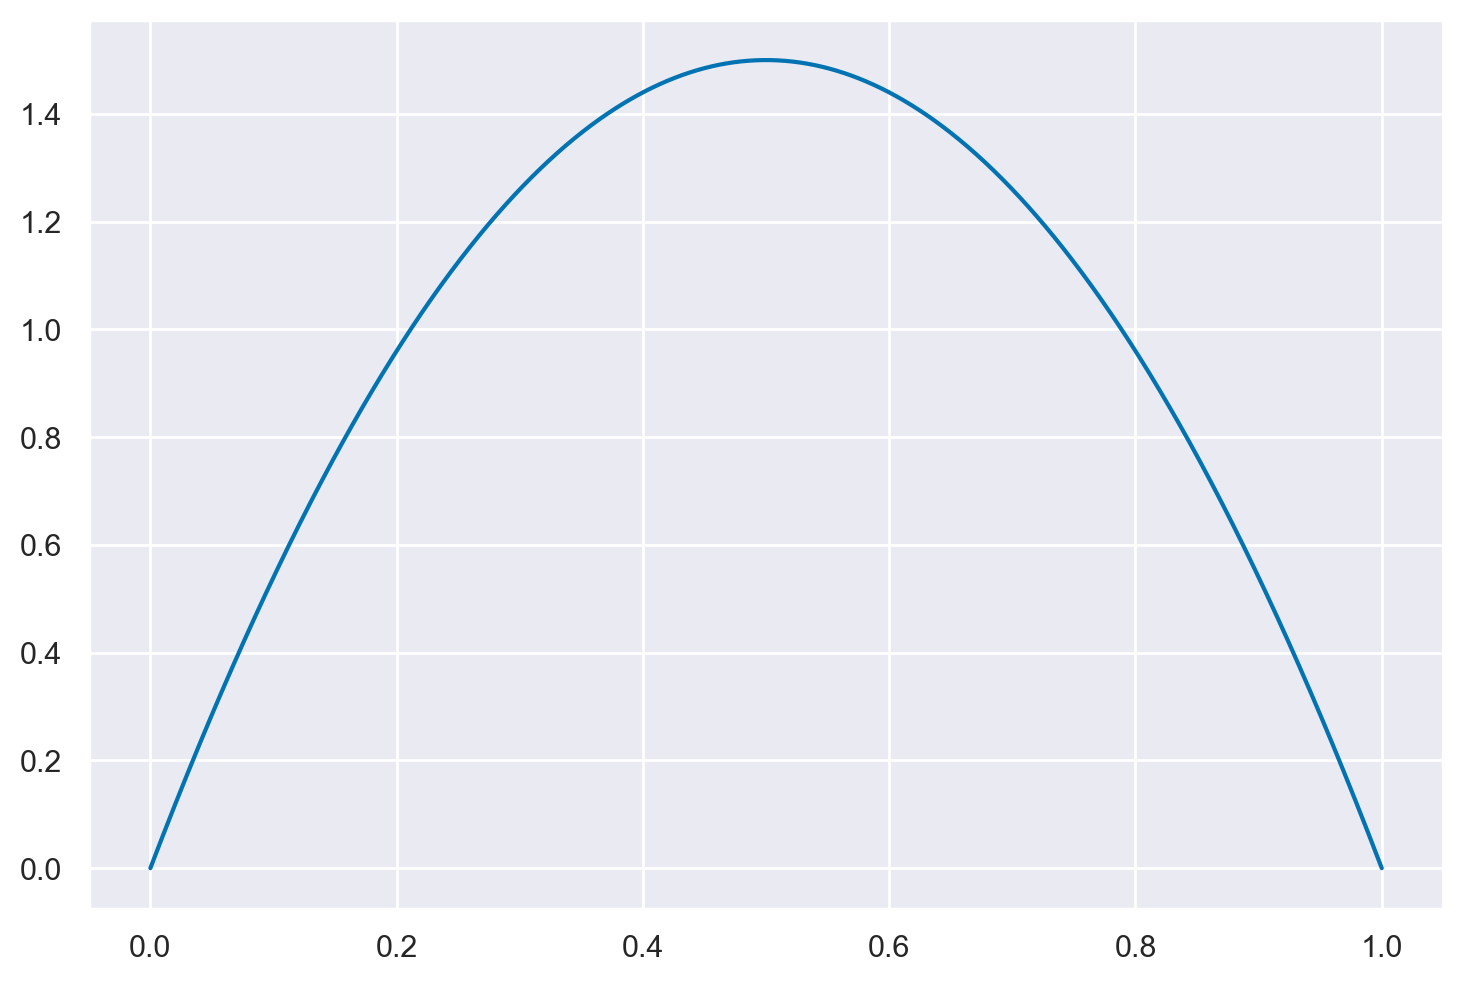

In [18]:
theta = np.linspace(0, 1, 1000)
_ = plt.plot(theta, stats.beta.pdf(theta, 2, 2), '-')

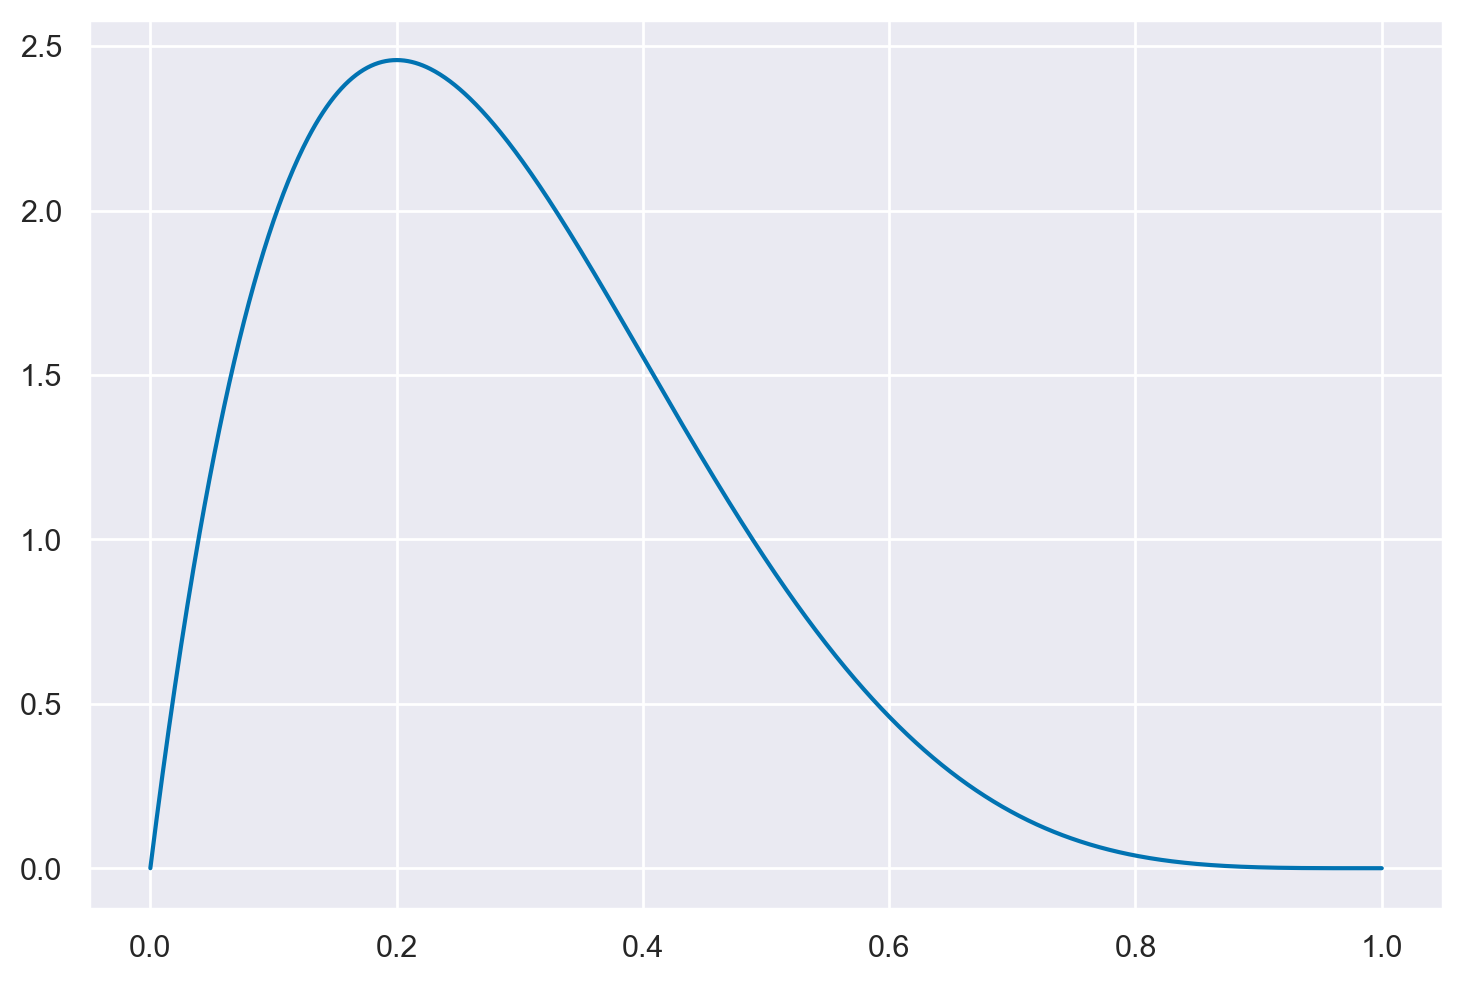

In [19]:
_ = plt.plot(theta, stats.beta.pdf(theta, 2, 5), '-')

In [20]:
prior = stats.beta.pdf(theta, 2, 5) 
prior = prior / np.sum(prior)

In [21]:
lk = stats.binom.pmf(12, 20, theta)
lk = lk / np.sum(lk)

In [22]:
post = (prior * lk) / np.sum(prior * lk)

In [23]:
np.sum(post)

1.0

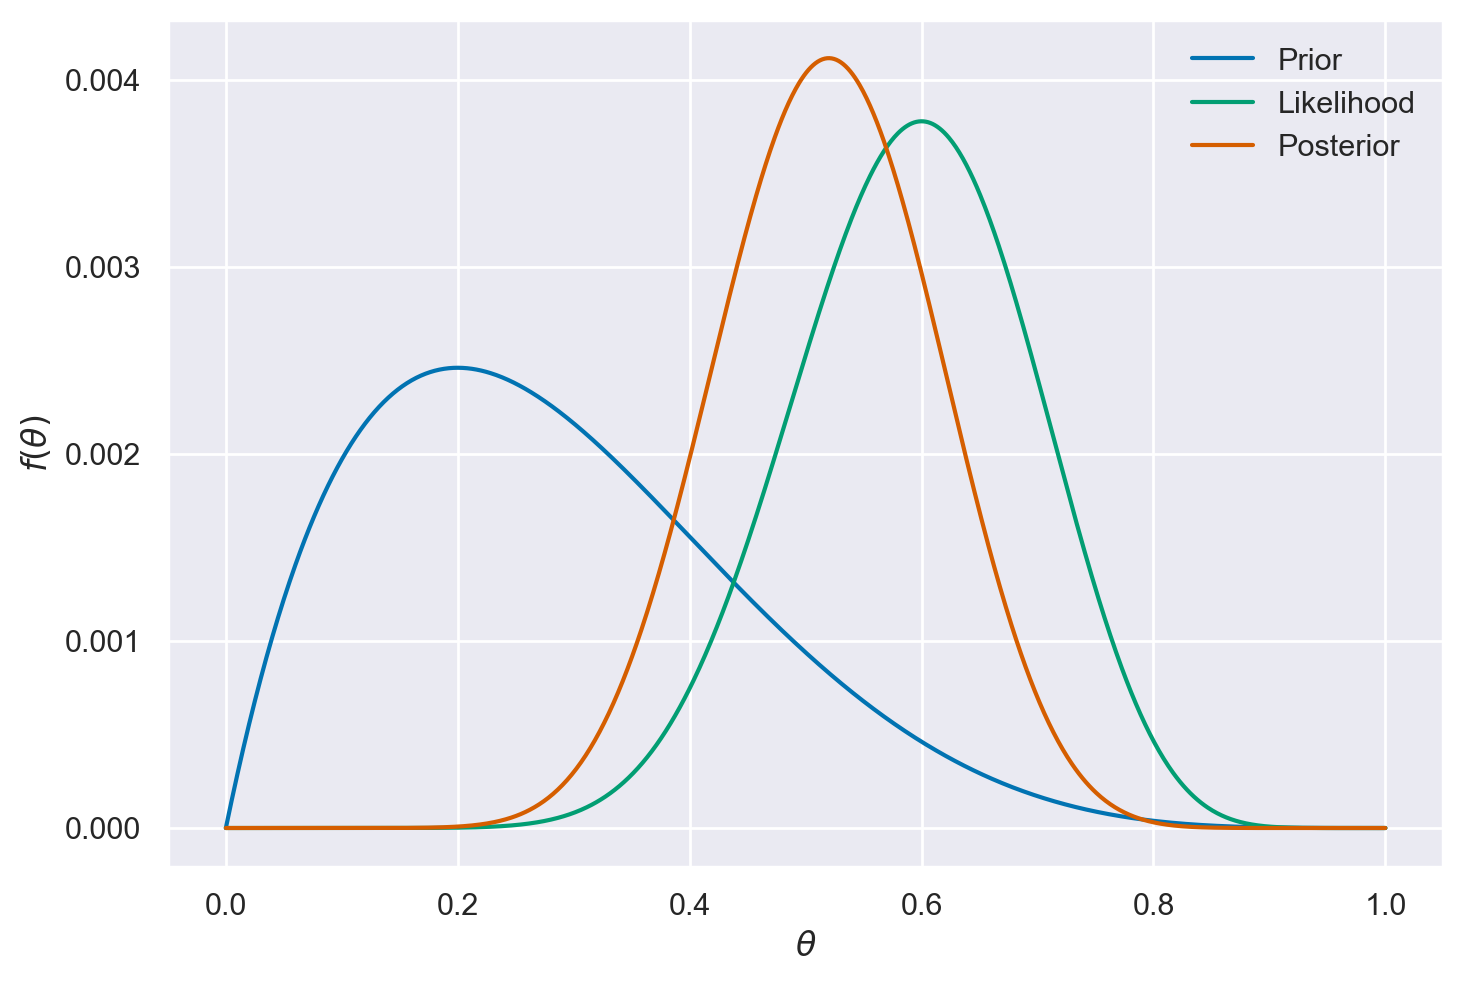

In [24]:
plt.plot(theta, prior, linestyle="solid", color="C0", label="Prior")
plt.plot(theta, lk, linestyle="solid", color="C2", label="Likelihood")
plt.plot(theta, post, linestyle="solid", color="C3", label="Posterior")
plt.xlabel(r"$\theta$")
plt.ylabel(r"$f(\theta)$")
plt.legend()
plt.show();

In [25]:
# media
np.sum(theta * post)

0.5185185185185185

In [26]:
# deviazione standard
np.sqrt(np.sum(theta**2 * post) - (np.sum(theta * post)) ** 2)

0.09442628728875585

In [27]:
samples = np.random.choice(theta, p=post, size=int(1e4), replace=True)

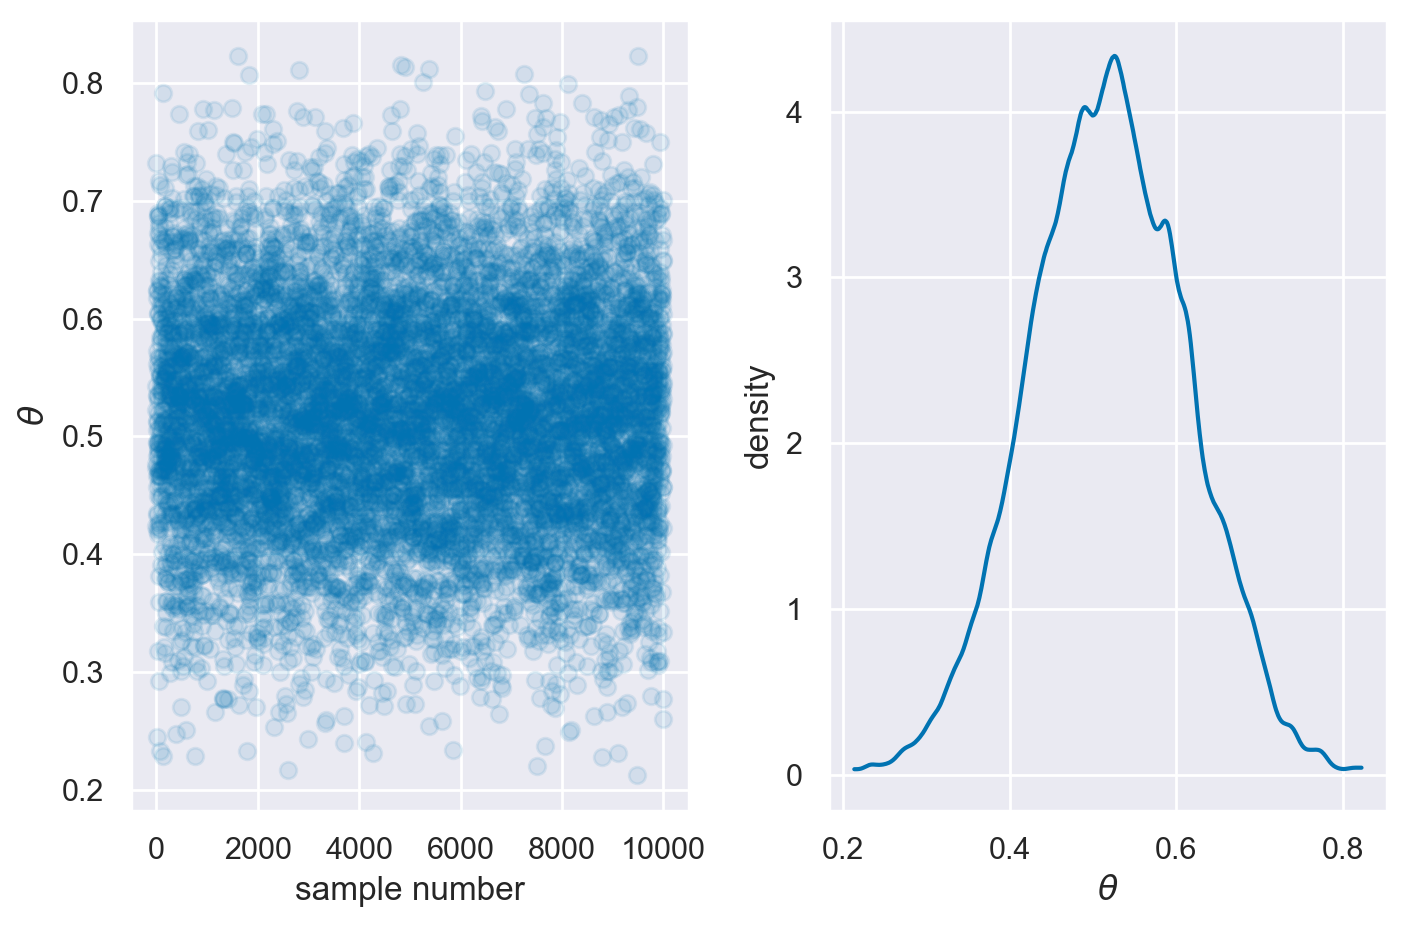

In [28]:
# First subplot: Scatter plot
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.plot(samples, 'o', alpha=0.1)
plt.xlabel("sample number")
plt.ylabel(r"$\theta$")

# Second subplot: KDE plot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
az.plot_kde(samples)
plt.xlabel(r"$\theta$")
plt.ylabel("density")
plt.tight_layout()
plt.show();

In [29]:
np.mean(samples)

0.518583983983984

In [30]:
np.std(samples)

0.09414275849972156

In [31]:
theta[post == max(post)]

array([0.51951952])

In [32]:
stats.mode(samples)[0]

0.5295295295295295

In [33]:
np.median(samples)

0.5185185185185185

In [34]:
sum(post[theta < 0.5])

0.42250915497600505

In [35]:
sum(samples < 0.5) / 1e4

0.4251

In [36]:
sum((samples > 0.5) & (samples < 0.75)) / 1e4

0.5688

In [37]:
np.percentile(samples, [3, 97])

array([0.34134134, 0.69469469])

In [38]:
az.hdi(samples, hdi_prob=0.94)

array([0.34434434, 0.6956957 ])

In [39]:
%load_ext watermark
%watermark -n -u -v -iv -w

Last updated: Fri Jan 26 2024

Python implementation: CPython
Python version       : 3.11.7
IPython version      : 8.19.0

pandas     : 2.1.4
matplotlib : 3.8.2
xarray     : 2023.12.0
arviz      : 0.17.0
numpy      : 1.26.2
statsmodels: 0.14.1
pymc       : 5.10.3
seaborn    : 0.13.0
scipy      : 1.11.4

Watermark: 2.4.3

